<a href="https://colab.research.google.com/github/JonathanTeklu/ML-stock-price-predictions/blob/main/IS427_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d marianadeem755/amazon-stockamzn-datasetinnovation-and-growth

Dataset URL: https://www.kaggle.com/datasets/marianadeem755/amazon-stockamzn-datasetinnovation-and-growth
License(s): apache-2.0


The code above downloads kaggle into colab and opens the dataset from the URL

In [3]:
!unzip amazon-stockamzn-datasetinnovation-and-growth.zip -d /content/

Archive:  amazon-stockamzn-datasetinnovation-and-growth.zip
  inflating: /content/AMZN.csv       


In [4]:
import pandas as pd

df = pd.read_csv('/content/AMZN.csv')
print(df.head())

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

         Date        Open        High         Low       Close   Adj Close  \
0  2023-07-03  130.820007  131.850006  130.070007  130.220001  130.220001   
1  2023-07-05  130.240005  131.399994  129.639999  130.380005  130.380005   
2  2023-07-06  128.250000  128.729996  127.370003  128.360001  128.360001   
3  2023-07-07  128.589996  130.970001  128.130005  129.779999  129.779999   
4  2023-07-10  129.070007  129.279999  125.919998  127.129997  127.129997   

     Volume  
0  28264800  
1  35895400  
2  40639900  
3  41928700  
4  61889300  


df.dropna() - removes rows with missing data
df.fillna() - fills missing values with NULL
df.dropduplicates() - removes duplicate data

In [5]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
...,...,...,...,...,...,...,...
247,2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900
248,2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
249,2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
250,2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


df.fillna('NULL') -- Fills empty cells with the word 'Null'

In [6]:
df.fillna('NULL')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
...,...,...,...,...,...,...,...
247,2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900
248,2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
249,2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
250,2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


df.drop_duplicates() -- Drops duplicate data entries to mantain data consistency
df.head() -- restructures the table and gets rid of unimportant columns
df.describe() -- changes the row and column names so that they are more descriptive

In [7]:
df.drop_duplicates()
df.head()
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.341865,157.982817,154.708691,156.451826,156.451826,4.754280e+07
std,21.876892,22.039902,21.742540,21.948251,21.948251,1.776402e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,2.237840e+07
25%,135.365006,137.330005,134.024998,135.360001,135.360001,3.694968e+07
50%,152.415001,153.930000,151.294999,152.639999,152.639999,4.407735e+07
75%,178.135002,180.035000,176.447502,178.442497,178.442497,5.296302e+07
max,197.729996,200.429993,195.929993,200.000000,200.000000,1.529387e+08


The code below changes the dates in the dataset to a standard 'Date' input and makes it the primary reference. It then prints out the total number of null values in each row, which ideally should be 0

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


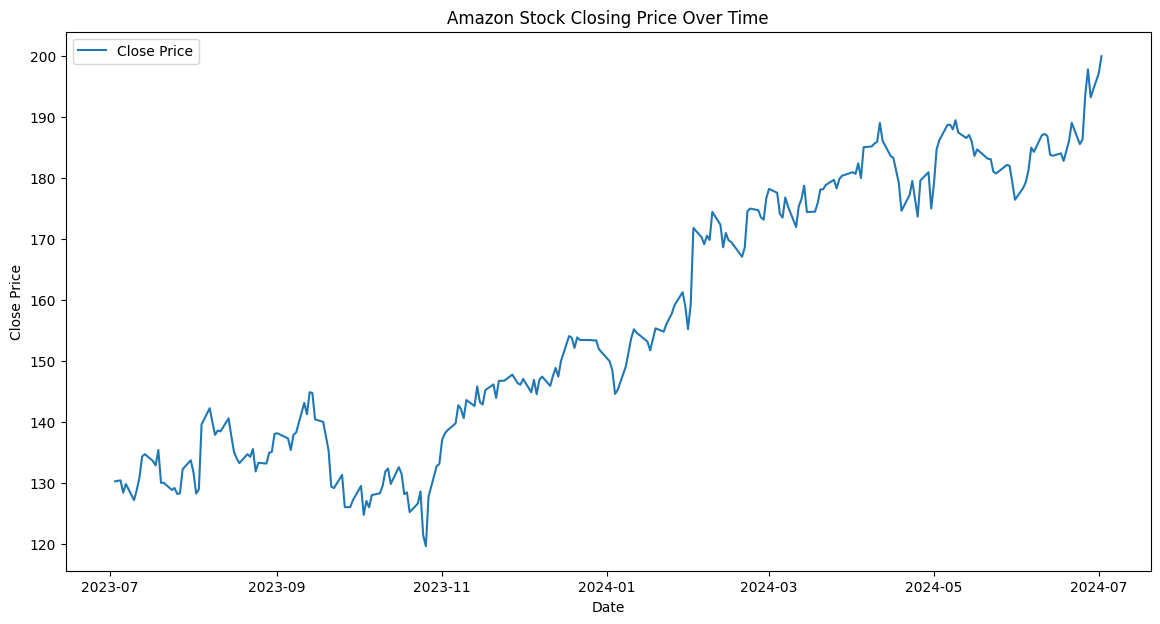

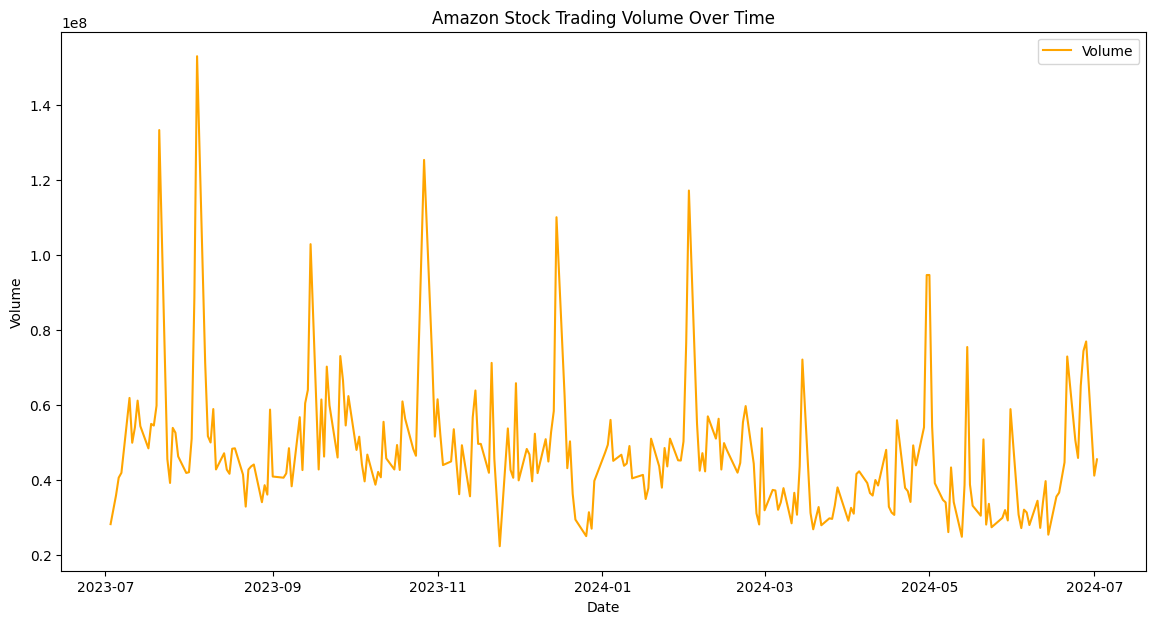

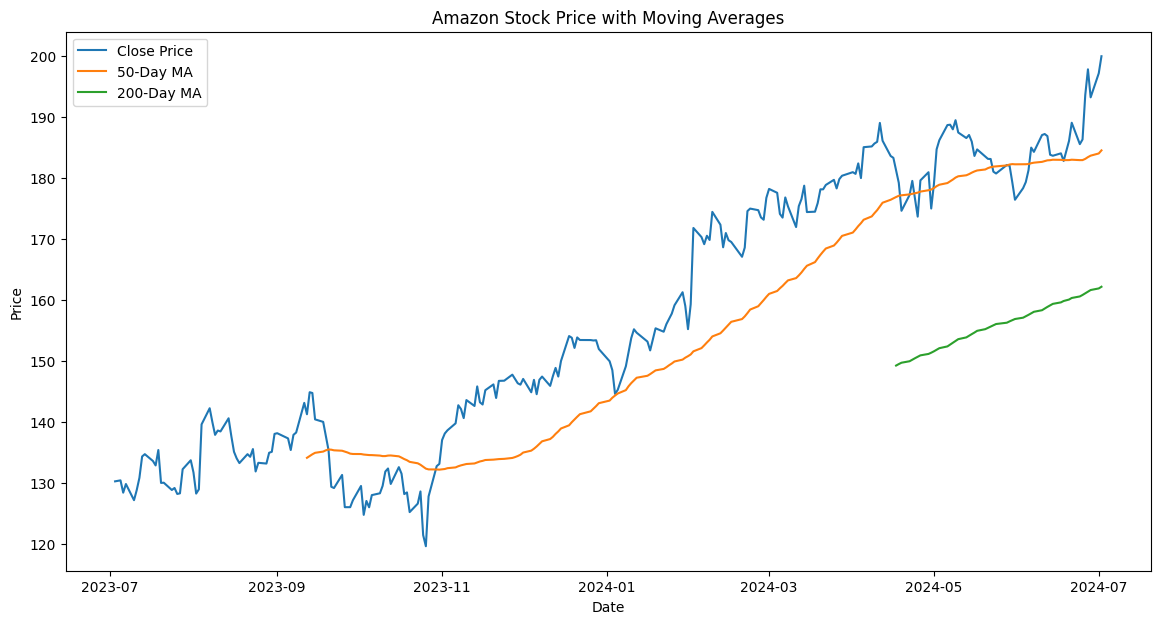

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.isnull().sum())

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Amazon Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Amazon Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Start of the Linear Regression Model

In [9]:
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']].dropna()
y = df['Close'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42, 6) (11, 6) (42,) (11,)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2742915900618468
R-squared: 0.962113737599894


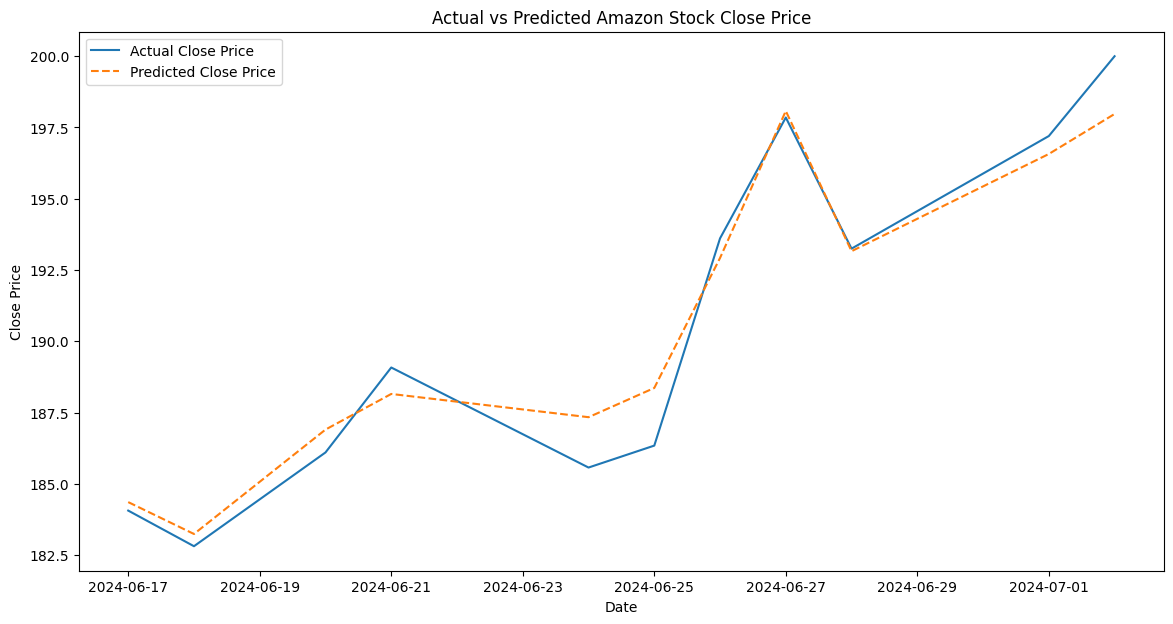

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Amazon Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [12]:
latest_data = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']].iloc[-1:].dropna()

future_pred = model.predict(latest_data)
print(f'Predicted future close price: {future_pred[0]}')

Predicted future close price: 197.97445290390107


Starting to implement Random Forest Regressor

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.2241
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0294
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0314
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0056
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0123
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0078
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0066
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0059
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0041
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0048
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step


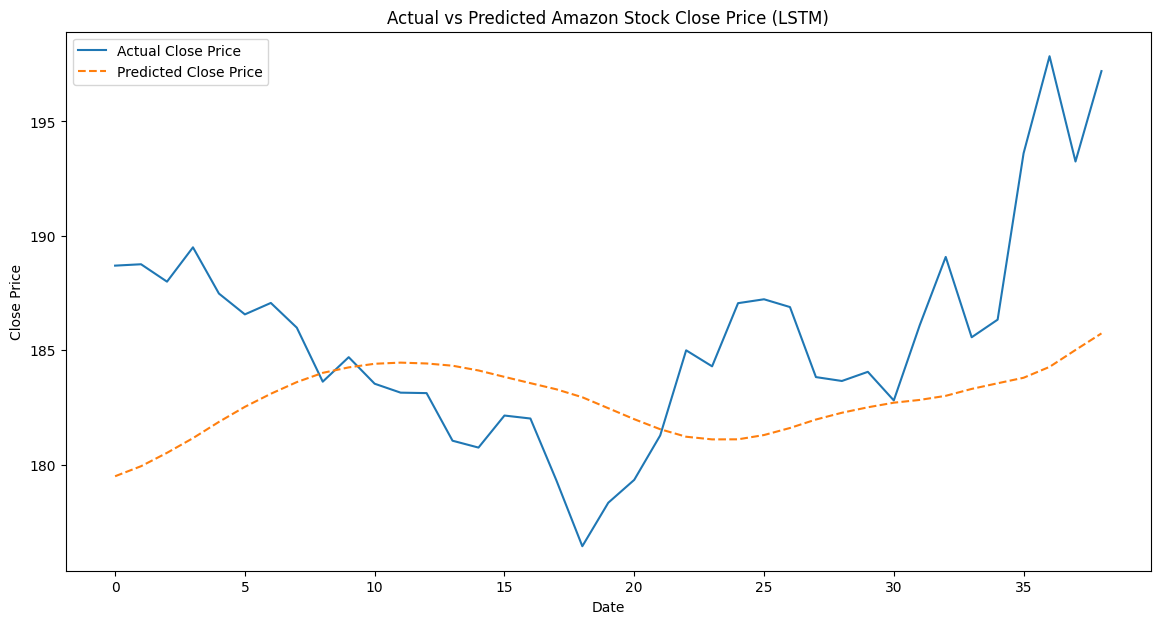

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted next day close price: 187.5595245361328


In [13]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
# Assuming df is already loaded and 'Close' column exists

# Scale the 'Close' price data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']].values)  # Scaling only the 'Close' price

# Create sequences for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Input features (60 time steps)
        y.append(data[i + time_step, 0])  # Target (next day's 'Close')
    return np.array(X), np.array(y)

# Create sequences of 60 days
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape the data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dense(units=1))  # Output layer for predicted stock price

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions
predicted_price = scaler.inverse_transform(predictions)

# Rescale actual test values for comparison
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Actual Close Price')
plt.plot(predicted_price, label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Amazon Stock Close Price (LSTM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict the next day's stock price (using the last sequence of data)
latest_data = scaled_data[-time_step:].reshape(1, time_step, 1)
future_pred = model.predict(latest_data)
future_price = scaler.inverse_transform(future_pred)

print(f'Predicted next day close price: {future_price[0][0]}')


The following code is me attempting to compare it to a stock prediction model from yahoo

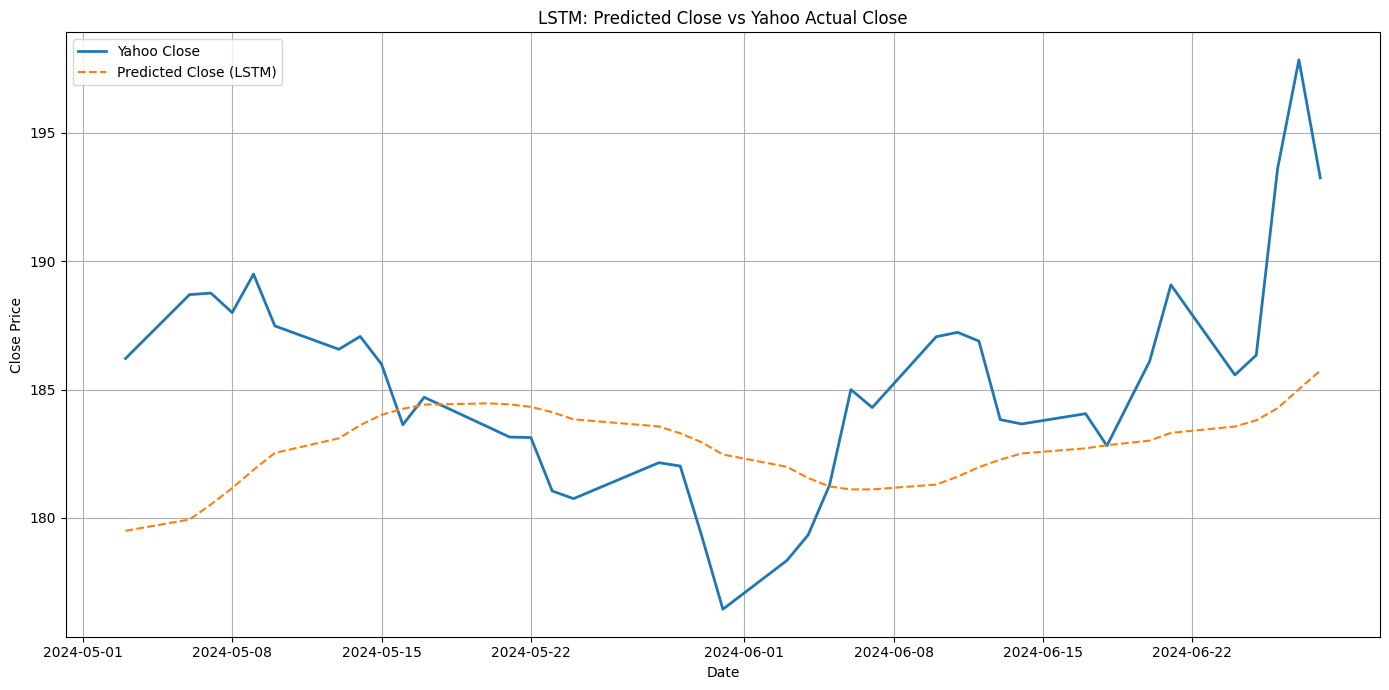

         Date  Yahoo_Close  Predicted_Close
0  2024-05-03   186.210007       179.497437
1  2024-05-06   188.699997       179.936249
2  2024-05-07   188.759995       180.520813
3  2024-05-08   188.000000       181.161636
4  2024-05-09   189.500000       181.872910
5  2024-05-10   187.479996       182.530441
6  2024-05-13   186.570007       183.101852
7  2024-05-14   187.070007       183.610428
8  2024-05-15   185.990005       184.015121
9  2024-05-16   183.630005       184.253860
10 2024-05-17   184.699997       184.412247
11 2024-05-20   183.539993       184.462082
12 2024-05-21   183.149994       184.424805
13 2024-05-22   183.130005       184.327652
14 2024-05-23   181.050003       184.119781
15 2024-05-24   180.750000       183.839066
16 2024-05-28   182.149994       183.565430
17 2024-05-29   182.020004       183.296631
18 2024-05-30   179.320007       182.949402
19 2024-05-31   176.440002       182.470459
20 2024-06-03   178.339996       181.990372
21 2024-06-04   179.339996      

In [16]:
# Fetch Yahoo Finance data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

amazon_stock = yf.Ticker("AMZN")
yahoo_data = amazon_stock.history(start="2023-07-01", end="2024-07-01")
yahoo_data = yahoo_data[['Close']].reset_index()
yahoo_data['Date'] = yahoo_data['Date'].dt.tz_localize(None)
yahoo_data.rename(columns={'Close': 'Yahoo_Close'}, inplace=True)

# Prepare LSTM predicted dataframe
lstm_predictions_df = pd.DataFrame({
    'Predicted_Close': predicted_price.flatten()
})

# Match dates: take last N rows from Yahoo to match prediction length
recent_yahoo = yahoo_data.tail(len(lstm_predictions_df)).reset_index(drop=True)
lstm_predictions_df = lstm_predictions_df.reset_index(drop=True)

# Merge Date, Yahoo Actual, and LSTM Predictions
merged_df = pd.concat([recent_yahoo[['Date', 'Yahoo_Close']], lstm_predictions_df], axis=1)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Yahoo_Close'], label='Yahoo Close', linewidth=2)
plt.plot(merged_df['Date'], merged_df['Predicted_Close'], label='Predicted Close (LSTM)', linestyle='--')
plt.title('LSTM: Predicted Close vs Yahoo Actual Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print merged results
print(merged_df)


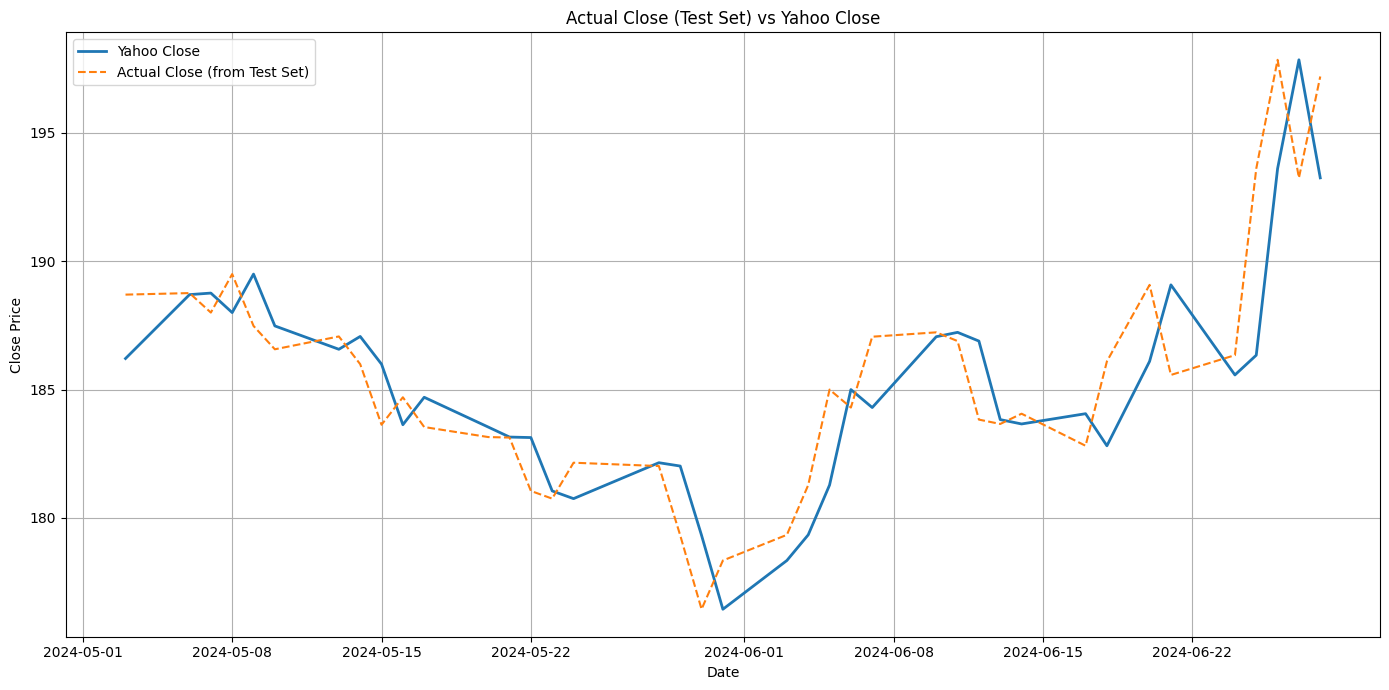

         Date  Yahoo_Close  Actual_Close
0  2024-05-03   186.210007    188.699997
1  2024-05-06   188.699997    188.759995
2  2024-05-07   188.759995    188.000000
3  2024-05-08   188.000000    189.500000
4  2024-05-09   189.500000    187.479996
5  2024-05-10   187.479996    186.570007
6  2024-05-13   186.570007    187.070007
7  2024-05-14   187.070007    185.990005
8  2024-05-15   185.990005    183.630005
9  2024-05-16   183.630005    184.699997
10 2024-05-17   184.699997    183.539993
11 2024-05-20   183.539993    183.149994
12 2024-05-21   183.149994    183.130005
13 2024-05-22   183.130005    181.050003
14 2024-05-23   181.050003    180.750000
15 2024-05-24   180.750000    182.149994
16 2024-05-28   182.149994    182.020004
17 2024-05-29   182.020004    179.320007
18 2024-05-30   179.320007    176.440002
19 2024-05-31   176.440002    178.339996
20 2024-06-03   178.339996    179.339996
21 2024-06-04   179.339996    181.279999
22 2024-06-05   181.279999    185.000000
23 2024-06-06   

In [17]:
# Inverse transform y_test if it's still scaled
actual_price = scaler.inverse_transform(y_test.reshape(-1, 1))  # Ensure y_test is a 2D array

# Prepare actual close dataframe
actual_close_df = pd.DataFrame({
    'Actual_Close': actual_price.flatten()
})

# Match dates: take last N rows from Yahoo to match actual data
recent_yahoo = yahoo_data.tail(len(actual_close_df)).reset_index(drop=True)
actual_close_df = actual_close_df.reset_index(drop=True)

# Merge Date, Yahoo Close, and Actual Close from model's test set
merged_actual_df = pd.concat([recent_yahoo[['Date', 'Yahoo_Close']], actual_close_df], axis=1)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(merged_actual_df['Date'], merged_actual_df['Yahoo_Close'], label='Yahoo Close', linewidth=2)
plt.plot(merged_actual_df['Date'], merged_actual_df['Actual_Close'], label='Actual Close (from Test Set)', linestyle='--')
plt.title('Actual Close (Test Set) vs Yahoo Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print merged results
print(merged_actual_df)
